/tmp/ipykernel_2732194/1290890781.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mean = df.groupby('bins')['Difference'].mean()
/tmp/ipykernel_2732194/1290890781.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_count = df.groupby('bins')['Difference'].count()


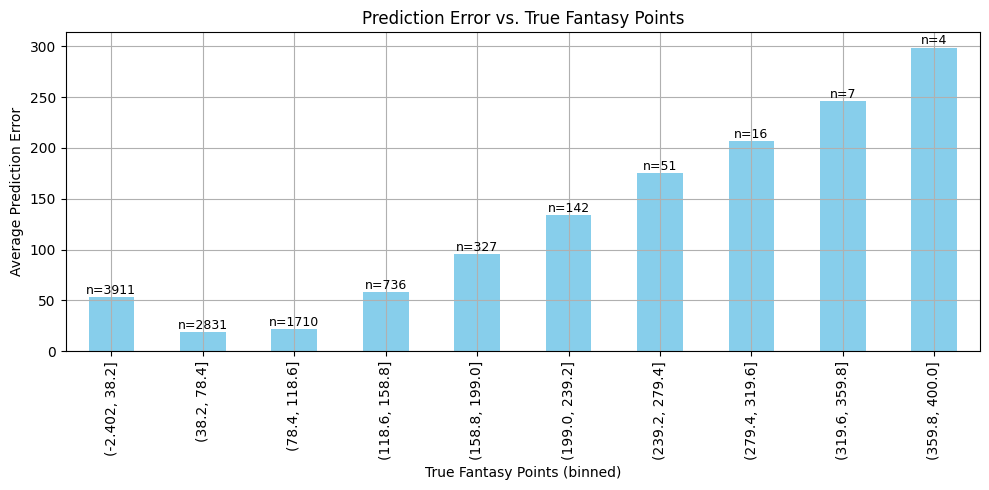

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('predictions.csv')

# Create bins
df['bins'] = pd.cut(df['True Values'], bins=10)

# Group by bins
grouped_mean = df.groupby('bins')['Difference'].mean()
grouped_count = df.groupby('bins')['Difference'].count()

# Plot
ax = grouped_mean.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel('True Fantasy Points (binned)')
plt.ylabel('Average Prediction Error')
plt.title('Prediction Error vs. True Fantasy Points')
plt.grid(True)

# Add count labels above each bar
for i, (mean, count) in enumerate(zip(grouped_mean, grouped_count)):
    ax.text(i, mean + 0.05, f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipykernel_3209487/186721690.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mean = df.groupby('bins')['Difference'].mean().reset_index()
/tmp/ipykernel_3209487/186721690.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_count = df.groupby('bins')['Difference'].count()


bins           category
Difference      float64
upper_limit     float64
dtype: object


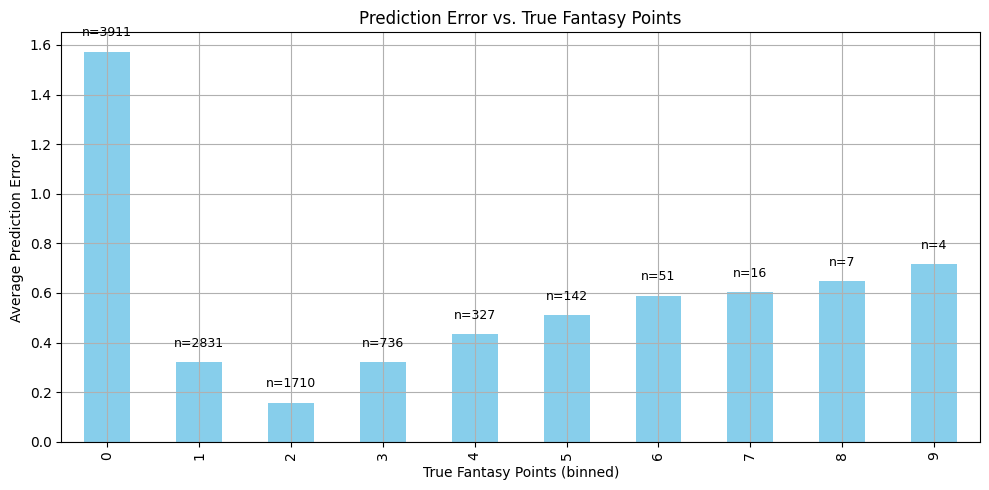

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('predictions.csv')

# Create bins
df['bins'] = pd.cut(df['True Values'], bins=10)

# Group by bins
grouped_mean = df.groupby('bins')['Difference'].mean().reset_index()
grouped_mean["upper_limit"] = grouped_mean["bins"].apply(lambda x: x.right).astype(float)

grouped_count = df.groupby('bins')['Difference'].count()

print(grouped_mean.dtypes)

grouped_mean = grouped_mean["Difference"] / grouped_mean["upper_limit"]

# Plot
ax = grouped_mean.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel('True Fantasy Points (binned)')
plt.ylabel('Average Prediction Error')
plt.title('Prediction Error vs. True Fantasy Points')
plt.grid(True)

# Add count labels above each bar
for i, (mean, count) in enumerate(zip(grouped_mean, grouped_count)):
    ax.text(i, mean + 0.05, f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
